# collect all data and put them in a single dataframe

In [1]:
import os
import pandas as pd

results_path = "/home/boonstra/xin_results_25_3_no_error_check"

data_frames = []
for filename in os.listdir(results_path):
    seed, extension = os.path.splitext(filename)
    if extension.lower() != ".csv":
        continue
    filepath = os.path.join(results_path, filename)
    df = pd.read_csv(filepath, header=0)
    df["seed"] = seed
    data_frames.append(df)

all_data = pd.concat(data_frames)
all_data.index = range(len(all_data))
final_task_data = all_data[all_data["task"] == "C8"]

In [2]:
error_included_data = []
for seed, data in all_data.groupby("seed"):
    if any(data["scenario"].notna()):
        error_included_data.append(data)
error_included_data = pd.concat(error_included_data)
final_task_error_included_data = error_included_data[error_included_data["task"] == "C8"]

In [88]:
from matplotlib.axes._axes import Axes
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import laplace



def plot_histogram(data, bins, n_failure_free, figure_name, y_lims = [None, None], y_tick_increment = [0.5, 0.1], x_lims = [-7, -3.5], mean=0.000161, title=""):

    fig, axs = plt.subplots(1,2)
    scale_factor = 3
    n_bins=50
    fig.set_size_inches(w=scale_factor*80/25.4, h=scale_factor*40/25.4)
    log_values = [np.log10(value) for value in data if value >= 2e-7]
    
    n_values = len(data)
    n_log_values = len(log_values)
    n_zero_values =  n_values - n_log_values
    print(n_values, n_log_values, n_zero_values)

    lap_loc = np.log10(mean)
    lap_pairs = sorted([(abs(v - lap_loc), v) for v in log_values], key=lambda x: x[0])
    lap_pairs = lap_pairs[n_failure_free:]
    lap_differences, lap_values = zip(*lap_pairs)
    lap_scale = np.mean(lap_differences)

    ax: Axes = axs[0]
    n, bins, patches = ax.hist(log_values, bins=bins, linewidth=0.5, edgecolor="black")
    bin_width = bins[1] - bins[0]
    lap_loc, lap_scale = laplace.fit(lap_values)
    lap_x = np.arange(-7, 0.01, 0.01)
    lap_y = laplace.pdf(lap_x, loc=lap_loc, scale=lap_scale) * len(lap_values) * bin_width
    # ax.plot(lap_x, lap_y, color="red", linewidth=1.0)
    ax.set_title("all results")
    ax.set_xlabel("Failure probability [-]")
    ax.set_ylabel("Frequency [%]")
    ax.text(x=0.47, y= 0.95, s=f"cut-off: {round(max(n)/1000,2)}%",transform=ax.transAxes)
    ax.text(x=0.02, y= 0.95, s=f"zero-probability: {round(n_zero_values/1000,1)}%",transform=ax.transAxes)
    ax.text(x=0.02, y= 0.90, s=f"error-free: {round(n_failure_free/1000,1)}%",transform=ax.transAxes)
    axs[0] = ax

    # plot zoomed in figure on degradations
    ax: Axes = axs[1]
    n, bins, patches = ax.hist(log_values, bins=bins, linewidth=0.5, edgecolor="black")
    # ax.plot(lap_x, lap_y, color="red", linewidth=1.0)
    ax.set_title("degradations")
    ax.set_xlabel("Failure probability [-]")
    ax.set_ylabel("Frequency [%]")
    axs[1] = ax

    for i in [0,1]:
        ax: Axes = axs[i]
        if y_lims[i] is None:
            _, y_max = ax.get_ylim()
        else:
            y_max = y_lims[i] * n_values / 100
        x_min = x_lims[i]
        ax.set_ylim(0,y_max)
        ax.set_xlim(x_min, 0)
        axs[i] = ax

    fig.suptitle(title)
    # fig.tight_layout()
    for i in [0,1]:
        ax: Axes = axs[i]

        if y_lims[i] is None:
            _, y_max = ax.get_ylim()
            y_max /= n_values/100
        else:
            y_max = y_lims[i]
        x_min = x_lims[i]

        
        x_tick_positions = ax.get_xticks()
        x_tick_labels = ["$\mathregular{10^{%s}}$" %(item,) for item in x_tick_positions]
        ax.set_xticks(x_tick_positions, x_tick_labels)

        y_tick_values = np.arange(0, y_max + y_tick_increment[i], y_tick_increment[i])
        y_tick_positions = y_tick_values * n_values / 100
        y_tick_labels = [f"{round(item,1)}" for item in y_tick_values]
        ax.set_yticks(y_tick_positions, y_tick_labels)
        axs[i] = ax
    plt.tight_layout()
    fig.savefig(f"{figure_name}.png")
    return

99878 97809 2069


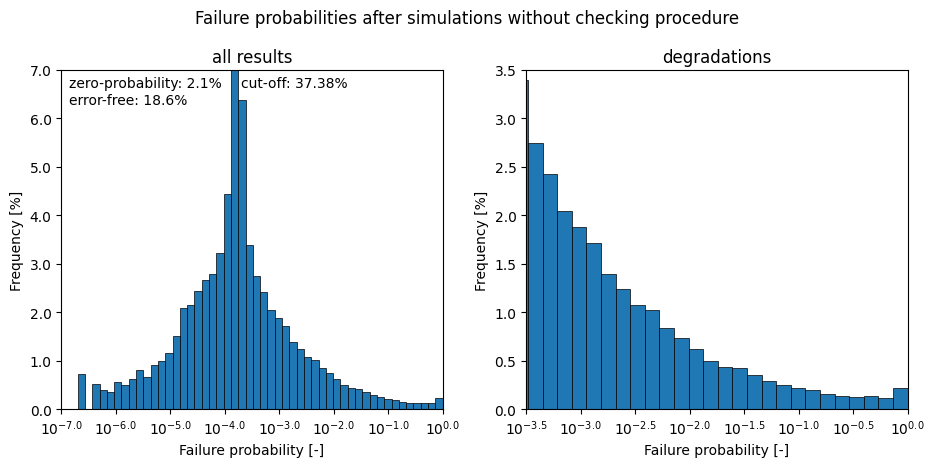

In [89]:

plot_histogram(
    data=final_task_data['total'], bins=50,
    n_failure_free=len(final_task_data) - len(final_task_error_included_data),
    figure_name="probabilities_after_simulation_without_checks",
    y_lims=[7, 3.5],y_tick_increment=[1.0,0.5],
    title="Failure probabilities after simulations without checking procedure"
)

plt.show()

In [ ]:

fig, ax = plt.subplots(1,1)
scale_factor = 3
fig.set_size_inches(w=scale_factor*40/25.4, h=scale_factor*40/25.4)
log_values = [np.log10(value) for value in final_task_data["total"] if value >= 2e-7]
n, bins, patches = ax.hist(log_values, bins=50, linewidth=0.5, edgecolor="black")
ax.set_title("Failure probabilities after simulations\nwithout check")
ax.set_xlabel("Failure probability [-]")
ax.set_ylabel("Frequency [%]")

fig.tight_layout()
x_ticks = ["$\mathregular{10^{%s}}$" %(item.get_text(),) for item in ax.get_xticklabels()]
ax.set_xticklabels(x_ticks)
y_ticks = [f"{round(float(item.get_text())/1000,2)}" for item in ax.get_yticklabels()]
ax.set_yticklabels(y_ticks)
fig.savefig("probabilities_after_simulation_without_checks_no_zoom.png")
plt.show()